<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500,>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>PyTorch. Основы: синтаксис, torch.cuda и torch.autograd</b></h2>

<p style="align: center;"><img src="https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/pytorch-logo-dark.png", width=400, height=300></p>

На этом занятии мы рассмотрим основы фреймворка глубокого обучения PyTorch.  

Когда хочется написать какую-нибудь нейросеть, решающую определённую задачу, будь то какая-нибудь простая классификация чего-либо или обнаружение лиц людей на видео. Всё, конечно, всегда начинается со **сбора данных**, а уже потом реализуются модели и проводятся эксперименты.  

Однако люди быстро поняли, что писать свои нейронные сети каждый раз с нуля ну очень уж долго и неразумно, поэтому придумали так называемые **фреймворки** - модули, в которых есть функционал, с помощью которого можно быстро и просто решать типовые задачи, и уже с помощью этих средств писать решения к более сложным задачам.

Есть много различных фремворков глубокого обучения. Разница между ними прежде всего в том, каков общий принцип вычислений. 
Например, в **Caffe и Caffe2** вы пишете код, по сути, составляя его из готовых "кусочков", как в Lego, в **TensorFlow и Theano** вы сначала объявляете вычислительный граф, потом компилируете его и запускаете (sees.run()), в то время как в **Torch и PyTorch** вы пишете почти точно так же, как на NumPy, а граф вычислений создаётся только при запуске (то есть существует только во время выполнения, потом он "разрушается"). **Keras** позволяет как строить блоки, так и компилировать свой граф:

<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png", width=500, height=500></p>  
<p style="text-align: center;"><i>Картинка взята из отличной [статьи на Хабре](https://habr.com/post/334380/)</i><p>

<h3 style="text-align: center;"><b>Установка</b></h3>

Инструкция по установке PyTorch есть на официальном [Github'e Deep Learning School](https://github.com/deepmipt/dlschl/wiki/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%86%D0%B8%D1%8F-%D0%BF%D0%BE-%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5-PyTorch).

<h3 style="text-align: center;">Синтаксис<b></b></h3>

In [2]:
import torch

Сначала немного фактов про PyTorch:  
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision для` написания нейросеток с минимальными усилиями
- в некоторых задачах даже быстрее TensorFlow (но не во всех)  
- легко проводить вычисления на GPU

Если PyTorch представить формулой, то она будет такой:  

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://ru.wikipedia.org/wiki/CUDA))

Посмотрим, как в PyTorch выполняются операции с векторами.  

Напоминание: **тензором** называется многомерный вектор, то есть есть:  

x = np.array([1,2,3]) - вектор = тензор размерности 1 (то есть (1,))  
y = np.array([[1, 2, 3], [4, 5, 6]]) - матрица = тензор размерности 2 (в данном случае тензор (2, 3))  
z = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
              [[1, 2, 3], [4, 5, 6], [7, 8, 9]]]) - "кубик" (3, 3, 3) = тензор размерности 3 (в данном случае (3, 3, 3))

Простейшим примером 3-мерного тензора является **картинка** - это "параллелепипед" из чисел, у коготорого три размерности - высота, ширина и количество каналов, значит это тензор размерности 3.

Понятие тензора нужно знать потому, что в PyTorch мы оперируем переменными типа `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`), и пугаться их названий совершенно не нужно - это просто векторы, у которых несколько размерностей.

Все типы тензоров:

In [3]:
torch.HalfTensor      # 16 бит, с плавающей точкой
torch.FloatTensor     # 32 бита,  с плавающей точкой
torch.DoubleTensor    # 64 бита, с плавающей точкой

torch.ShortTensor     # 16 бит, целочисленный, знаковый
torch.IntTensor       # 32 бита, целочисленный, знаковый
torch.LongTensor      # 64 бита, целочисленный, знаковый

torch.CharTensor      # 8 бит, целочисленный, знаковый
torch.ByteTensor      # 8 бит, целочисленный, беззнаковый

torch.ByteTensor

Мы будем использовать только `torch.FloatTensor()` и `torch.IntTensor()`. 

Перейдём к делу:

* Создание тензоров:

In [4]:
a = torch.FloatTensor([1, 2])
a

tensor([1., 2.])

In [5]:
a.shape

torch.Size([2])

In [6]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [7]:
b.shape

torch.Size([2, 3])

In [92]:
x = torch.FloatTensor(2,3,4)

In [93]:
x

tensor([[[2.7153e+36, 8.4078e-43, 8.9683e-44, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 2.6726e+23, 8.5499e+20]],

        [[5.4692e-05, 1.0316e-08, 4.2891e-08, 1.7279e-04],
         [6.5190e-10, 1.0547e-08, 2.1781e-04, 6.7655e+22],
         [1.3541e-05, 2.1178e+23, 3.3859e-06, 6.7358e+22]]])

In [10]:
x = torch.FloatTensor(100)
x

tensor([       nan,        nan, 2.8026e-45, 0.0000e+00, 1.6647e-42, 0.0000e+00,
        5.6052e-45, 0.0000e+00, 8.6320e-43, 0.0000e+00, 5.6052e-45, 0.0000e+00,
        1.9058e-42, 0.0000e+00, 5.7593e-43, 0.0000e+00, 1.9282e-42, 0.0000e+00,
        5.7593e-43, 8.4078e-43, 8.0715e-43, 0.0000e+00, 5.7593e-43, 8.4078e-43,
        1.9562e-42, 0.0000e+00, 5.7593e-43, 8.4078e-43, 1.6703e-42, 0.0000e+00,
        5.7593e-43, 0.0000e+00, 1.6647e-42, 0.0000e+00, 5.7593e-43, 8.4078e-43,
        2.0459e-42, 0.0000e+00, 5.7593e-43, 8.4078e-43, 8.6320e-43, 0.0000e+00,
        5.7593e-43, 0.0000e+00, 1.0986e-42, 0.0000e+00, 5.7593e-43, 7.1746e-43,
        1.6647e-42, 0.0000e+00, 5.6052e-45, 8.4078e-43, 8.6320e-43, 0.0000e+00,
        5.6052e-45, 0.0000e+00, 1.3405e+01, 4.5914e-41, 1.3405e+01, 4.5914e-41,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.6472e+36, 8.4078e-43, 2.6472e+36, 8.4078e-43,
        0.0000e+00, 0.0000e+00, 0.0000e+

In [11]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

**Обратите внимание** - если вы создаёте тензор через задание размерностей (как в примере выше), то он изначально заполняюстя случайным "мусором". Что инициализировать нулями, нужно написать .zero_() в конце:

In [12]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[   65793,    65537,    65537,    65537],
         [16842753, 16842753, 16842753,    65537]],

        [[16842753, 16842753,    65537, 16842753],
         [16842753,    65537, 16843009,        0]],

        [[       0, 16843009,        0,    65536],
         [16842752,      257, 16843009, 16843009]]], dtype=torch.int32)

In [13]:
x = torch.IntTensor(3, 2, 4).zero_()
x

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=torch.int32)

Аналог функции `np.reshape()` == `torch.view()`:

In [15]:
b.view(3, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [16]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

**Обратите внимание** - torch.view() создаёт новый тензор, а не изменяет старый!

In [17]:
b.view(-1)

tensor([1., 2., 3., 4., 5., 6.])

In [18]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

* Изменение типа тензора:

In [19]:
a = torch.FloatTensor([1.5, 3.2, -7])

In [20]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [21]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

Обратите внимание, что при `.type_as()` создаётся новый тензор (старый не меняется), то есть это не in-place операция:

In [22]:
a

tensor([ 1.5000,  3.2000, -7.0000])

* Индексация точная такая же, как и в NumPy:

In [23]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [24]:
a[0, 0]

tensor(100.)

In [25]:
a[0][0]

tensor(100.)

In [26]:
a[0:2, 0:2]

tensor([[100.,  20.],
        [ 15., 163.]])

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [32]:
# Ваш код здесь
a = torch.FloatTensor(3,4)
b = torch.FloatTensor(12)
c = b.view(2,2,3)

In [33]:
a

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [34]:
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
c

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

In [38]:
a[:,0]

tensor([0., 0., 0.])

**Арифметика и булевы операции** работаю также, как и в NumPy, **НО** лучше использовать не опреаторы `+`, `-`, `*`, `/`, а их аналоги:  

| Оператор | Аналог |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

* Сложение:

In [39]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [40]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

Лучше:

In [41]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [42]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [43]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

* Вычитание:

In [44]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

Лучше:

In [45]:
a.sub(b)

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

* Умножение (поэлементное):

In [46]:
a * b

tensor([[-1.0000e+00, -4.0000e+00, -9.0000e+00],
        [-1.0000e+02, -4.0000e+02, -9.0000e+02],
        [-1.0000e+04, -4.0000e+04, -9.0000e+04]])

Лучше:

In [47]:
a.mul(b)

tensor([[-1.0000e+00, -4.0000e+00, -9.0000e+00],
        [-1.0000e+02, -4.0000e+02, -9.0000e+02],
        [-1.0000e+04, -4.0000e+04, -9.0000e+04]])

* Деление (поэлементное):

In [48]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [49]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

Лучше:

In [50]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

Заметьте, все эти операции **не меняют исходные тензоры**, а **создают новые**:

In [51]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [52]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [57]:
# Ваш код здесь
a = torch.FloatTensor(range(5*2)).view(5,2)
b = torch.FloatTensor(range(1*10)).view(1,10)

In [58]:
a

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

In [59]:
b

tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [60]:
c = b.view(5,2)
c

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

In [61]:
a.add(c)

tensor([[ 0.,  2.],
        [ 4.,  6.],
        [ 8., 10.],
        [12., 14.],
        [16., 18.]])

In [62]:
a.sub(c)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [63]:
a.mul(c)

tensor([[ 0.,  1.],
        [ 4.,  9.],
        [16., 25.],
        [36., 49.],
        [64., 81.]])

In [64]:
a.div(c)

tensor([[nan, 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

* **Операторы сравнения**:

In [65]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [66]:
a == b

tensor([[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]], dtype=torch.uint8)

In [67]:
a != b

tensor([[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]], dtype=torch.uint8)

In [68]:
a < b

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)

In [69]:
a > b

tensor([[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]], dtype=torch.uint8)

* **Булевы маски**:

In [70]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [71]:
b[a == b]

tensor([100., 200., 300.])

Опять же, тензоры не меняются:

In [72]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [73]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

Применение **стандартных функций** такое же, как и в numpy - поэлементное:

In [74]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [75]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [76]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [77]:
a.cos()

tensor([[ 0.5403, -0.4161, -0.9900],
        [-0.8391,  0.4081,  0.1543],
        [ 0.8623,  0.4872, -0.0221]])

In [78]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [79]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [80]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [81]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

**Сумма, среднее, максимум, минимум**:

In [82]:
a.sum()

tensor(666.)

In [83]:
a.mean()

tensor(74.)

По осям:

In [84]:
a.sum(0)

tensor([111., 222., 333.])

In [85]:
a.sum(1)

tensor([  6.,  60., 600.])

In [86]:
a.max()

tensor(300.)

In [87]:
a.max(0)

(tensor([100., 200., 300.]), tensor([2, 2, 2]))

In [88]:
a.min()

tensor(1.)

In [89]:
a.min(0)

(tensor([1., 2., 3.]), tensor([0, 0, 0]))

Обратите внимание - второй тензор при вызове функций .max() и .min() - это индексы этих максимальных/минимальных элементов по указанной размерности (то есть в данном случае a.min() вернул (1, 2, 3) - минимумы по 0 оси (по столбцам), и их индексы по 0-ой оси (0,0,0) (номер каждого элемента в своём столбце)).

### Задача 3

Создайте тензор `a` размерности (100, 780, 780, 3) (можно интерпретировать это как 100 картинок размера 780х780 с тремя цветовыми каналами) и выведите первый элемент этого тензора как картинку (с помощью matplotlib.pyplot).

Выведите среднее элементов по 1-ой оси (по сути - средняя картинка по всем картинкам) и по 4-ой оси (по сути - усреднение каналов для каждой картинки).

In [105]:
# Ваш код здесь
a = torch.FloatTensor(range(100*780*780*3)).view(100, 780, 780, 3)

In [106]:
a[0]

tensor([[[0.0000e+00, 1.0000e+00, 2.0000e+00],
         [3.0000e+00, 4.0000e+00, 5.0000e+00],
         [6.0000e+00, 7.0000e+00, 8.0000e+00],
         ...,
         [2.3310e+03, 2.3320e+03, 2.3330e+03],
         [2.3340e+03, 2.3350e+03, 2.3360e+03],
         [2.3370e+03, 2.3380e+03, 2.3390e+03]],

        [[2.3400e+03, 2.3410e+03, 2.3420e+03],
         [2.3430e+03, 2.3440e+03, 2.3450e+03],
         [2.3460e+03, 2.3470e+03, 2.3480e+03],
         ...,
         [4.6710e+03, 4.6720e+03, 4.6730e+03],
         [4.6740e+03, 4.6750e+03, 4.6760e+03],
         [4.6770e+03, 4.6780e+03, 4.6790e+03]],

        [[4.6800e+03, 4.6810e+03, 4.6820e+03],
         [4.6830e+03, 4.6840e+03, 4.6850e+03],
         [4.6860e+03, 4.6870e+03, 4.6880e+03],
         ...,
         [7.0110e+03, 7.0120e+03, 7.0130e+03],
         [7.0140e+03, 7.0150e+03, 7.0160e+03],
         [7.0170e+03, 7.0180e+03, 7.0190e+03]],

        ...,

        [[1.8182e+06, 1.8182e+06, 1.8182e+06],
         [1.8182e+06, 1.8182e+06, 1.8182e+06]

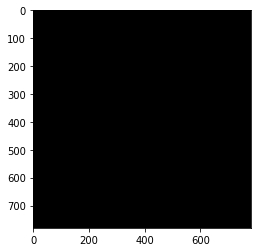

In [114]:
import numpy as np
import pandas as pd
import matplotlib as pyplot

from scipy import ndimage #спецификатор для работы с изображениями
from scipy import misc 
from PIL import Image

%matplotlib inline

pyplot.pyplot.imshow(a[99])

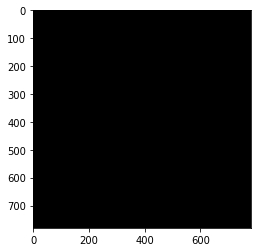

In [115]:
pyplot.pyplot.imshow(a.mean(0))

In [117]:
a.mean(3)

tensor([[[1.0000e+00, 4.0000e+00, 7.0000e+00,  ..., 2.3320e+03,
          2.3350e+03, 2.3380e+03],
         [2.3410e+03, 2.3440e+03, 2.3470e+03,  ..., 4.6720e+03,
          4.6750e+03, 4.6780e+03],
         [4.6810e+03, 4.6840e+03, 4.6870e+03,  ..., 7.0120e+03,
          7.0150e+03, 7.0180e+03],
         ...,
         [1.8182e+06, 1.8182e+06, 1.8182e+06,  ..., 1.8205e+06,
          1.8205e+06, 1.8205e+06],
         [1.8205e+06, 1.8205e+06, 1.8205e+06,  ..., 1.8229e+06,
          1.8229e+06, 1.8229e+06],
         [1.8229e+06, 1.8229e+06, 1.8229e+06,  ..., 1.8252e+06,
          1.8252e+06, 1.8252e+06]],

        [[1.8252e+06, 1.8252e+06, 1.8252e+06,  ..., 1.8275e+06,
          1.8275e+06, 1.8275e+06],
         [1.8275e+06, 1.8275e+06, 1.8275e+06,  ..., 1.8299e+06,
          1.8299e+06, 1.8299e+06],
         [1.8299e+06, 1.8299e+06, 1.8299e+06,  ..., 1.8322e+06,
          1.8322e+06, 1.8322e+06],
         ...,
         [3.6434e+06, 3.6434e+06, 3.6434e+06,  ..., 3.6457e+06,
          3.645

**Матричные операции:**

In [ ]:
z = x.mm(y)
z = torch.mm(x, y)
Матричное умножение.
z = x.mv(v)
z = torch.mv(x, v)
Умножение матрицы на вектор.
z = x.dot(y)
z = torch.dot(x, y)
Скалярное умножение тензоров.
bz = bx.bmm(by)
bz = torch.bmm(bx, by)
Перемножает матрицы целыми батчами.

* Транспонирование матрицы (тензора):

In [120]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [121]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

И снова - сам тензор не меняется (то есть при вызове создаётся новый):

In [122]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

* Скалярное произведение векторов (1-мерных тензоров):

In [123]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [124]:
a.dot(b)

tensor(-141.)

In [125]:
a @ b

tensor(-141.)

In [126]:
type(a)

torch.Tensor

In [127]:
type(b)

torch.Tensor

In [128]:
type(a @ b)

torch.Tensor

* Матричное умножение:

In [129]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [130]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [131]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

Тензоры неизменны:

In [132]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [133]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

In [134]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [135]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 1])


In [136]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

Если "развернуть" тензор b просто в массив элементов (`torch.view(-1)`), умножение будет как на столбец:

In [137]:
b

tensor([[ -1.],
        [-10.],
        [100.]])

In [138]:
b.view(-1)

tensor([ -1., -10., 100.])

In [139]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [140]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

**Перевод из NumPy в PyTorch**:

In [141]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.2463291 , 0.78316966, 0.4383879 ],
       [0.65044509, 0.98012521, 0.96865152],
       [0.39094892, 0.32270471, 0.34506555]])

In [142]:
b = torch.from_numpy(a)
b

tensor([[0.2463, 0.7832, 0.4384],
        [0.6504, 0.9801, 0.9687],
        [0.3909, 0.3227, 0.3451]], dtype=torch.float64)

**НО!** Обратите внимание - a и b в этом случае будут использовать одно и то же хранилище данных, то есть измение одного тензора будет менять и другой:

In [143]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [144]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

**Перевод из PyTorch в NumPy:**

In [145]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [146]:
type(a)

torch.Tensor

In [147]:
x = a.numpy()
x

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

In [148]:
x.shape

(2, 3, 4)

In [149]:
type(x)

numpy.ndarray

### Задача 4

Напишите функцию `forward_pass(X, w)` ($w_0$ входит в $w$) для одного нейрона (с сигмоидой) с помощью PyTorch (у вас уже должен быть код на NumPy).

In [174]:
def sigmoid(x):
    """Сигмоидальная функция"""
    return 1 / (1 + np.exp(-x))

In [177]:
def forward_pass(X, w):
    # Ваш код здесь
    n = X.shape[0]
    y_pred = torch.FloatTensor(n, 1)
    y_pred = sigmoid(X.mm(w).view(-1,1))
    return(y_pred)

In [187]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
w = torch.FloatTensor([[-0.5], [2.5]])
result = forward_pass(X, w)
print('result: {}'.format(result))

result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


Должно получиться: 

|variable|value|
|-|-|
|**X**|torch.FloatTensor([[-5, 5], [15, 20], [100, -700]])|
|**w**|torch.FloatTensor([[-0.5], [150]])|
|**result**|torch.FloatTensor([[1.0000], [0.9985], [0.0474]])|   

<h3 style="text-align: center;">[CUDA](https://ru.wikipedia.org/wiki/CUDA)<b></b></h3>

[Краткое видео про то, как GPU используется в обучении нейросетей](https://www.youtube.com/watch?v=EobhK0UZm80)

Все вычисления в PyTorch можно проводить как на CPU, так и на GPU (Graphical Processing Unit) (если она у вас есть). В PyTorch переключение между ними делается очень просто, что является одной из ключевых его особенностей.

In [188]:
x = torch.FloatTensor(1024, 1024).uniform_()
x

tensor([[0.5728, 0.0996, 0.0384,  ..., 0.1738, 0.7253, 0.0404],
        [0.3642, 0.6411, 0.5770,  ..., 0.1275, 0.8715, 0.5760],
        [0.6697, 0.0352, 0.7819,  ..., 0.5963, 0.3256, 0.9305],
        ...,
        [0.9034, 0.2852, 0.4114,  ..., 0.7779, 0.2535, 0.1815],
        [0.8416, 0.9871, 0.5399,  ..., 0.6213, 0.1137, 0.8769],
        [0.2967, 0.2717, 0.9423,  ..., 0.4702, 0.7844, 0.5223]])

In [189]:
x.is_cuda

False

Переместим на GPU:

In [190]:
x = x.cuda()

AssertionError: Torch not compiled with CUDA enabled

In [191]:
x.is_cuda

False

In [0]:
x


 9.8569e-01  3.7595e-01  8.7008e-01  ...   6.2316e-01  3.3482e-01  9.7367e-02
 7.7810e-01  8.5821e-01  7.8123e-01  ...   3.9363e-02  8.2963e-01  7.8153e-01
 5.9462e-01  7.5670e-01  7.3290e-01  ...   9.3771e-01  5.4976e-01  9.6451e-02
                ...                   ⋱                   ...                
 4.4887e-01  9.2894e-01  1.5457e-01  ...   5.6541e-01  2.8661e-02  1.8460e-01
 8.0305e-01  4.7660e-01  9.0947e-02  ...   7.2990e-01  6.3040e-01  8.8941e-01
 9.1068e-01  4.1714e-02  5.4457e-02  ...   2.6645e-01  8.3107e-01  6.7596e-01
[torch.cuda.FloatTensor of size 1024x1024 (GPU 0)]

Перемножим две тензора на GPu и вернём результат вычисления на CPU:

In [0]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [0]:
c


 1.3276e-01  4.6640e-02  3.6811e-03  ...   2.5005e-01  2.7425e-01  2.2217e-01
 7.6941e-02  2.2012e-01  8.5448e-02  ...   4.8152e-01  8.5428e-02  1.0293e-01
 1.8373e-01  2.2956e-01  6.7784e-02  ...   5.2270e-01  8.9739e-02  1.9734e-02
                ...                   ⋱                   ...                
 4.6043e-01  7.1955e-02  4.6278e-02  ...   1.6644e-01  8.8197e-02  1.0238e-01
 6.6998e-02  1.4303e-01  8.4953e-03  ...   1.1650e-01  1.1400e-01  6.0282e-01
 6.9519e-01  1.9520e-01  2.7402e-01  ...   1.5071e-01  1.6169e-01  2.4579e-01
[torch.FloatTensor of size 10000x10000]

In [0]:
a


 3.2185e-01  1.1987e-01  5.2117e-02  ...   8.2740e-01  6.0768e-01  8.3344e-01
 7.5668e-01  3.4455e-01  2.9262e-01  ...   5.0549e-01  1.3569e-01  2.9384e-01
 3.3093e-01  7.2330e-01  1.7693e-01  ...   5.6406e-01  9.8218e-02  6.4030e-02
                ...                   ⋱                   ...                
 5.8405e-01  2.0138e-01  9.9384e-01  ...   4.8946e-01  1.3532e-01  2.1701e-01
 5.6156e-01  3.5891e-01  6.3199e-01  ...   4.5497e-01  1.3874e-01  9.1001e-01
 8.4097e-01  8.8349e-01  4.3792e-01  ...   1.9193e-01  1.8535e-01  3.3038e-01
[torch.FloatTensor of size 10000x10000]

Тензоры, лежащие на CPU, и тензоры, лежащие на GPU, недоступны друг для друга:

In [0]:
a = torch.FloatTensor(1000, 1000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [0]:
a + b

TypeError: add received an invalid combination of arguments - got (torch.cuda.FloatTensor), but expected one of:
 * (float value)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.cuda.FloatTensor[0m)
 * (torch.FloatTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.cuda.FloatTensor[0m)
 * (torch.SparseFloatTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.cuda.FloatTensor[0m)
 * (float value, torch.FloatTensor other)
 * (float value, torch.SparseFloatTensor other)


Вот ещё немного про то, как можно работать с GPU:

In [0]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# проверяем, есть ли CUDA (то есть NVidia GPU)
if torch.cuda.is_available():
    # так можно получить имя устройства, которое связано с CUDA
    # (полезно в случае с несколькими видеокартами)
    device = torch.device('cuda')          # CUDA-device объект
    y = torch.ones_like(x, device=device)  # создаём тензор на GPU
    x = x.to(device)                       # тут можно просто ``.to("cuda")``
    z = x + y
    print(z)
    # с помощью``.to`` можно и изменить тип при перемещении
    print(z.to("cpu", torch.double))

tensor([[[ 1.4435,  1.3470,  1.3062,  1.4405,  1.2337],
         [ 1.7475,  1.2037,  1.7702,  1.0894,  1.2214],
         [ 1.5788,  1.3411,  1.7662,  1.4289,  1.4192],
         [ 1.2131,  1.8919,  1.9255,  1.7404,  1.2128],
         [ 1.2344,  1.8557,  1.0431,  1.2820,  1.1393]],

        [[ 1.4193,  1.3347,  1.5175,  1.5933,  1.4449],
         [ 1.6636,  1.0913,  1.6360,  1.1679,  1.3635],
         [ 1.1754,  1.6012,  1.4388,  1.4961,  1.8299],
         [ 1.2644,  1.3119,  1.2737,  1.5933,  1.4822],
         [ 1.2119,  1.5497,  1.3665,  1.6801,  1.2678]],

        [[ 1.2456,  1.1512,  1.3754,  1.0309,  1.1592],
         [ 1.8683,  1.9625,  1.5814,  1.9701,  1.7795],
         [ 1.9937,  1.1922,  1.8598,  1.9095,  1.0288],
         [ 1.2730,  1.5456,  1.1422,  1.0011,  1.5654],
         [ 1.5377,  1.6367,  1.6430,  1.8843,  1.1299]],

        [[ 1.8965,  1.1913,  1.9592,  1.4277,  1.1259],
         [ 1.4051,  1.4896,  1.7341,  1.3553,  1.3299],
         [ 1.7331,  1.4356,  1.8285,  1.29

<h3 style="text-align: center;">Autograd<b></b></h3>

Расшифровывается как Automatic Gradients (автоматическое взятие градиентов) - собственно, из названия понятно, что это модуль PyTorch, отвечающий за взятие производных.  

Возможно, для вас это бдет шок, но PyTorch (и любой фреймворк глубокого обучения) может продифференцировать функцию практически любой сложности.

Импортируем нужный класс:

In [192]:
from torch.autograd import Variable

Идея такая: оборачиваем тензор в класс Variable(), получаем тоже тензор, но он имеет способность вычислять себе градиенты.  

Если а - тензор, обёрнутый в Variable(), то при вызове a.backward() берутся градиенты по всем переменным, от которых зависит тензор a.

**ВНИМАНИЕ!**  

Если вы используете версию `pytorch 0.4.0` или более новую, то ***`torch.Tensor` и `torch.Variable` - одно и то же!*** То есть Вам больше не нужно оборачивать в `Variable()`, чтобы брать градиенты - они берутся и по `Tensor()` (`torch.Variable()` - deprecated).

Примеры:

In [205]:
x = torch.FloatTensor(3, 1).uniform_()
w = torch.FloatTensor(3, 3).uniform_() 
b = torch.FloatTensor(3, 1).uniform_()

x = Variable(x, requires_grad=True)
w = Variable(w, requires_grad=True)
b = Variable(b, requires_grad=False)

y = (w @ x).add_(b)

loss = y.sum()

# берём градиенты по всем "листьям" - в данном случае это тензоры x, w и b
loss.backward()

In [206]:
x.grad

tensor([[1.3157],
        [2.0838],
        [2.1617]])

In [207]:
w.grad

tensor([[0.2901, 0.4713, 0.7391],
        [0.2901, 0.4713, 0.7391],
        [0.2901, 0.4713, 0.7391]])

In [208]:
b.grad

In [209]:
y.grad

**Обратите внимание** - градиенты лежат в поле `.grad` у тех тензоров (Variable'ов), по которым брали эти градиенты. Градиенты **не лежат** в той Variable, от котороый они брались!

Получить тензор из `Variable()` можно с помощью поля `.data`:

In [210]:
x

tensor([[0.2901],
        [0.4713],
        [0.7391]], requires_grad=True)

In [211]:
x.data

tensor([[0.2901],
        [0.4713],
        [0.7391]])

### Задача 5

- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3), иницилизируйте их случайно равномерно (`.uniform_()`, как в примере выше)
- Создайте их копии на GPU, выведите их сумму и разность
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Получите тензор из `c` (то есть сейчас `c` - объект типа `Variable()`, вам нужно получить из него `FloatTensor()`)

In [0]:
# Ваш код здесь

<h3 style="text-align: center;">Полезные ссылки:<b></b></h3>

*1). Мегаполезная статья по PyTorch (на русском), на её основе делался этот ноутбук: https://habr.com/post/334380/*

*2). Туториалы от самих разработчиков фреймворка: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*3). Статья на arXiv о сравнении фреймворков глубокого обучения: https://arxiv.org/pdf/1511.06435.pdf*

4). *Ещё туториалы: https://github.com/yunjey/pytorch-tutorial*

*5). Сайт Facebook AI Research - отдела, который разрабатывает PyTorch и другие крутые вещи в AI: https://facebook.ai/developers/tools*